In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Report

In [3]:
report_df = pd.read_csv("data/final_report.csv")

In [4]:
report_df

,FROM,TO,activity,DURATION
0,2017-06-29 09:57:00,2017-06-29 10:17:00,Eat,20:00
1,2017-06-29 10:46:00,2017-06-29 11:07:00,In vehicle,21:00
2,2017-06-29 11:09:00,2017-06-29 12:12:00,Walk,03:00
3,2017-06-29 12:12:00,2017-06-29 12:21:00,Shop/Walk,09:00
4,2017-06-29 12:21:00,2017-06-29 12:29:00,Took off glasses/Shop/Walk,08:00
...,...,...,...,...
168,2017-07-12 16:40:00,2017-07-12 16:55:00,Walk,15:00
169,2017-07-12 17:00:00,2017-07-12 18:21:00,Meeting,21:00
170,2017-07-12 18:22:00,2017-07-12 18:27:00,In vehicle,05:00
171,2017-07-12 18:39:00,2017-07-12 19:10:00,In bus,31:00


In [5]:
report_df.DURATION.tolist()[0]

'20:00'

In [6]:
report_df['FROM'] = pd.to_datetime(report_df.FROM)
report_df['TO'] = pd.to_datetime(report_df.TO)


In [8]:
report_df["DURATION"] = report_df.TO - report_df.FROM

In [9]:
report_df.DURATION.describe()

count                          173
mean     0 days 00:43:38.150289017
std      0 days 01:17:32.976671713
min                0 days 00:01:00
25%                0 days 00:09:00
50%                0 days 00:20:00
75%                0 days 00:39:00
max                0 days 11:32:00
Name: DURATION, dtype: object

In [10]:
report_df.DURATION.tolist()[0]

Timedelta('0 days 00:20:00')

In [17]:
report_df["DURATION_IN_SECONDS"] = report_df.DURATION.map(lambda x:x.total_seconds())

In [20]:
report_df["DURATION_IN_HOURS"] = report_df.DURATION_IN_SECONDS.map(lambda x:x/3600)

In [13]:
report_df

,FROM,TO,activity,DURATION,DURATION_IN_SECONDS
0,2017-06-29 09:57:00,2017-06-29 10:17:00,Eat,0 days 00:20:00,1200.0
1,2017-06-29 10:46:00,2017-06-29 11:07:00,In vehicle,0 days 00:21:00,1260.0
2,2017-06-29 11:09:00,2017-06-29 12:12:00,Walk,0 days 01:03:00,3780.0
3,2017-06-29 12:12:00,2017-06-29 12:21:00,Shop/Walk,0 days 00:09:00,540.0
4,2017-06-29 12:21:00,2017-06-29 12:29:00,Took off glasses/Shop/Walk,0 days 00:08:00,480.0
...,...,...,...,...,...
168,2017-07-12 16:40:00,2017-07-12 16:55:00,Walk,0 days 00:15:00,900.0
169,2017-07-12 17:00:00,2017-07-12 18:21:00,Meeting,0 days 01:21:00,4860.0
170,2017-07-12 18:22:00,2017-07-12 18:27:00,In vehicle,0 days 00:05:00,300.0
171,2017-07-12 18:39:00,2017-07-12 19:10:00,In bus,0 days 00:31:00,1860.0


In [31]:
report_df.groupby('activity')['DURATION_IN_HOURS'].sum()

activity
At home                                             38.566667
At home/Eat                                          0.150000
Cooking                                              2.016667
Eat                                                  2.416667
Eat/At home                                          0.700000
Eat/In computer                                      0.250000
Eat/Phone was out of the pocket (forgot)/At home     0.333333
Eat/Watching TV/At home                              0.166667
Football                                             2.583333
In bus                                               5.883333
In computer                                          7.666667
In computer/At home                                  2.516667
In computer/Eat                                      0.583333
In computer/Work                                     2.700000
In vehicle                                           2.783333
Meeting                                              5.383333

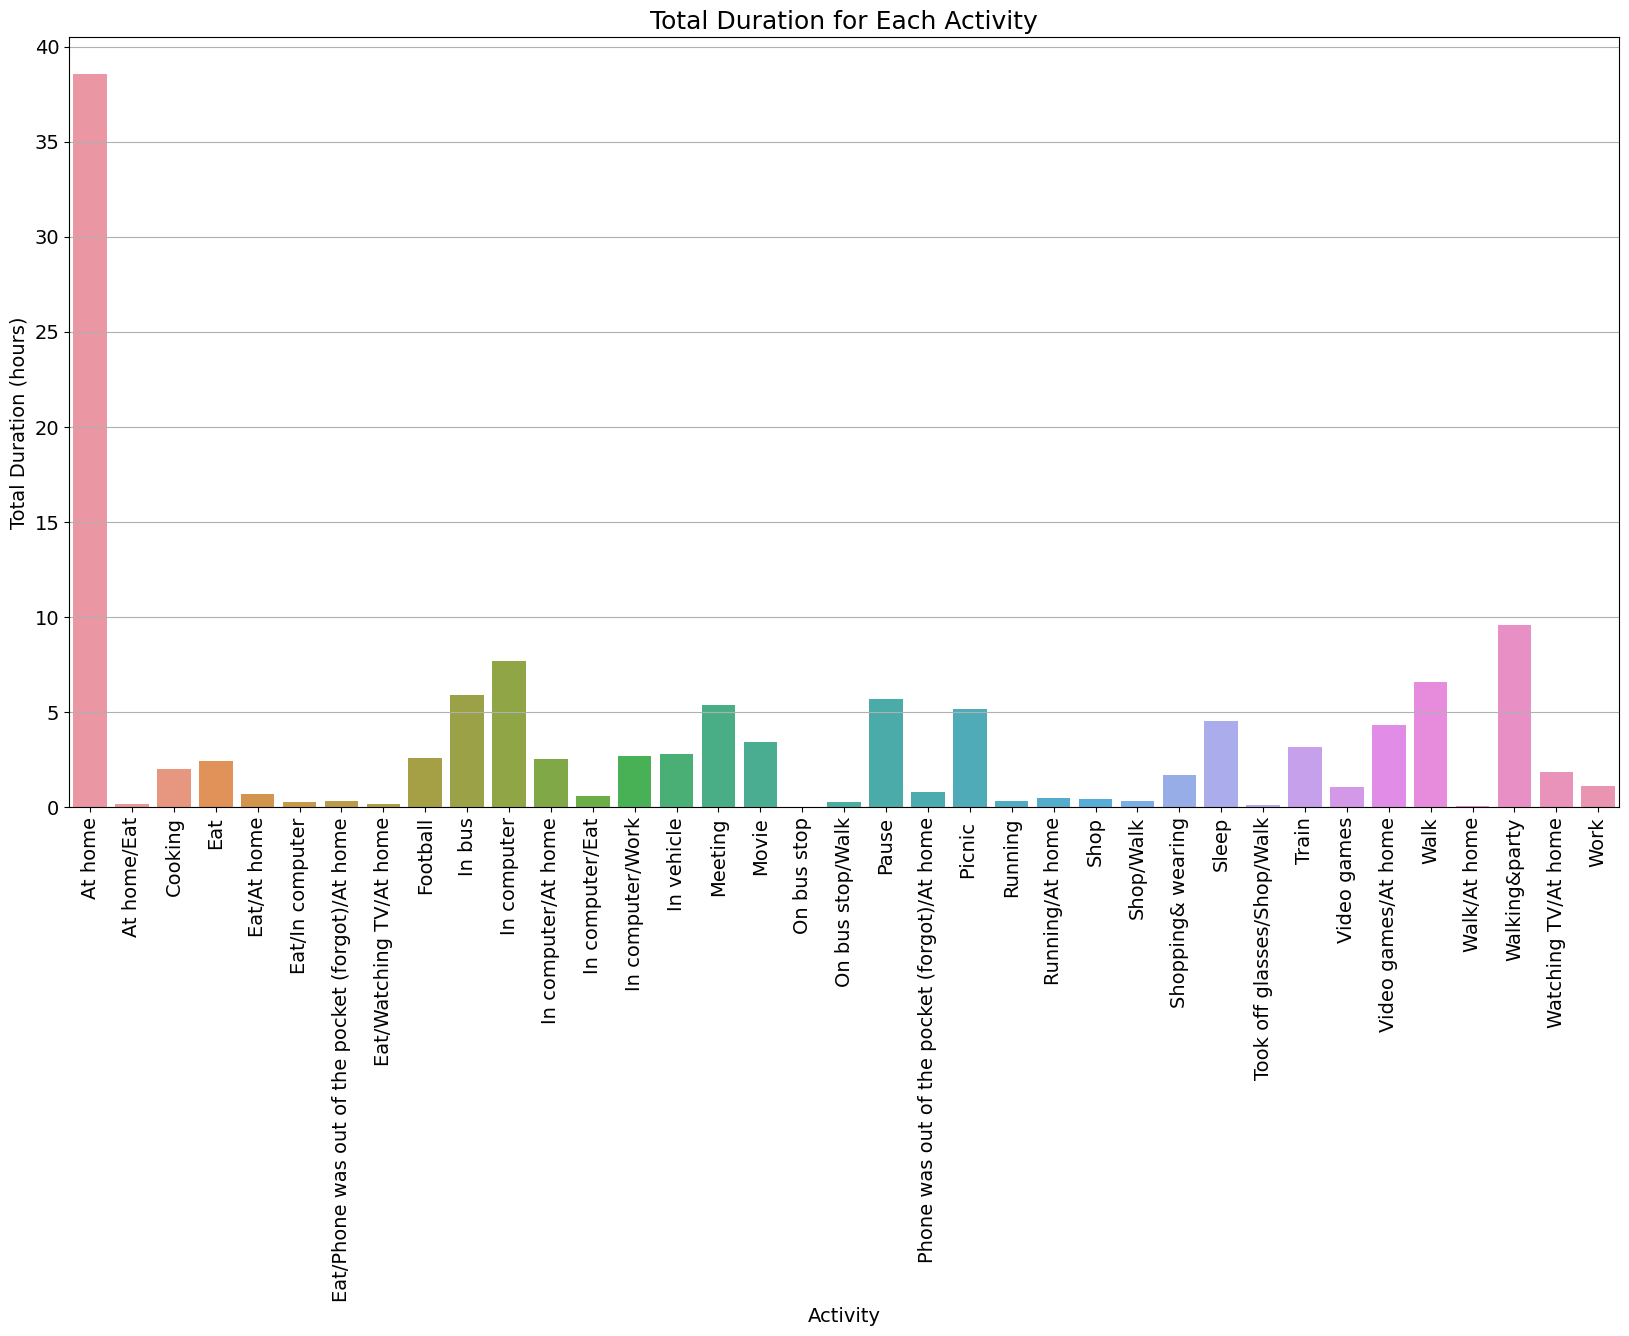

In [33]:
# Perform the groupby and sum operation
activity_duration_sum = report_df.groupby('activity')['DURATION_IN_HOURS'].sum().reset_index()

# Create a bar chart using Seaborn
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.barplot(x='activity', y='DURATION_IN_HOURS', data=activity_duration_sum)
plt.xlabel('Activity',fontsize=14)
plt.ylabel('Total Duration (hours)',fontsize=14)
plt.title('Total Duration for Each Activity',fontsize=18)
plt.xticks(rotation=90, fontsize=14)  # Rotate the x-axis labels for better readability
plt.yticks(fontsize=14)
plt.grid(axis='y')       # Add a grid for better visualization
plt.show()

# Phone data

In [35]:
smart_phone=pd.read_csv("data/F_smart_phone.csv")
smart_phone.head()

,timestamp,battery,light,pressure,proximity,step_counter,step_detector,ACC_X,ACC_Y,ACC_Z,...,ORI_Z,AUDIO_W,AUDIO_X,AUDIO_Y,AUDIO_Z,ROTATION_VECTOR_A,ROTATION_VECTOR_B,ROTATION_VECTOR_C,ROTATION_VECTOR_D,ROTATION_VECTOR_E
0,2017-06-29 07:45:16.506,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-29 07:45:16.514,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-06-29 07:45:16.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-29 07:45:17.407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,32767.0,NaN,NaN,NaN,NaN,NaN
4,2017-06-29 07:45:18.407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,227.0,113.5,227.0,227.0,NaN,NaN,NaN,NaN,NaN


In [36]:
smart_phone.columns

Index(['timestamp', 'battery', 'light', 'pressure', 'proximity',
       'step_counter', 'step_detector', 'ACC_X', 'ACC_Y', 'ACC_Z', 'GRAVITY_X',
       'GRAVITY_Y', 'GRAVITY_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'LA_X', 'LA_Y',
       'LA_Z', 'MAG_X', 'MAG_Y', 'MAG_Z', 'ORI_X', 'ORI_Y', 'ORI_Z', 'AUDIO_W',
       'AUDIO_X', 'AUDIO_Y', 'AUDIO_Z', 'ROTATION_VECTOR_A',
       'ROTATION_VECTOR_B', 'ROTATION_VECTOR_C', 'ROTATION_VECTOR_D',
       'ROTATION_VECTOR_E'],
      dtype='object')

In [37]:
feature_columns = ['battery', 'light', 'pressure', 'proximity',
       'step_counter', 'step_detector', 'ACC_X', 'ACC_Y', 'ACC_Z', 'GRAVITY_X',
       'GRAVITY_Y', 'GRAVITY_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'LA_X', 'LA_Y',
       'LA_Z', 'MAG_X', 'MAG_Y', 'MAG_Z', 'ORI_X', 'ORI_Y', 'ORI_Z', 'AUDIO_W',
       'AUDIO_X', 'AUDIO_Y', 'AUDIO_Z', 'ROTATION_VECTOR_A',
       'ROTATION_VECTOR_B', 'ROTATION_VECTOR_C', 'ROTATION_VECTOR_D',
       'ROTATION_VECTOR_E']


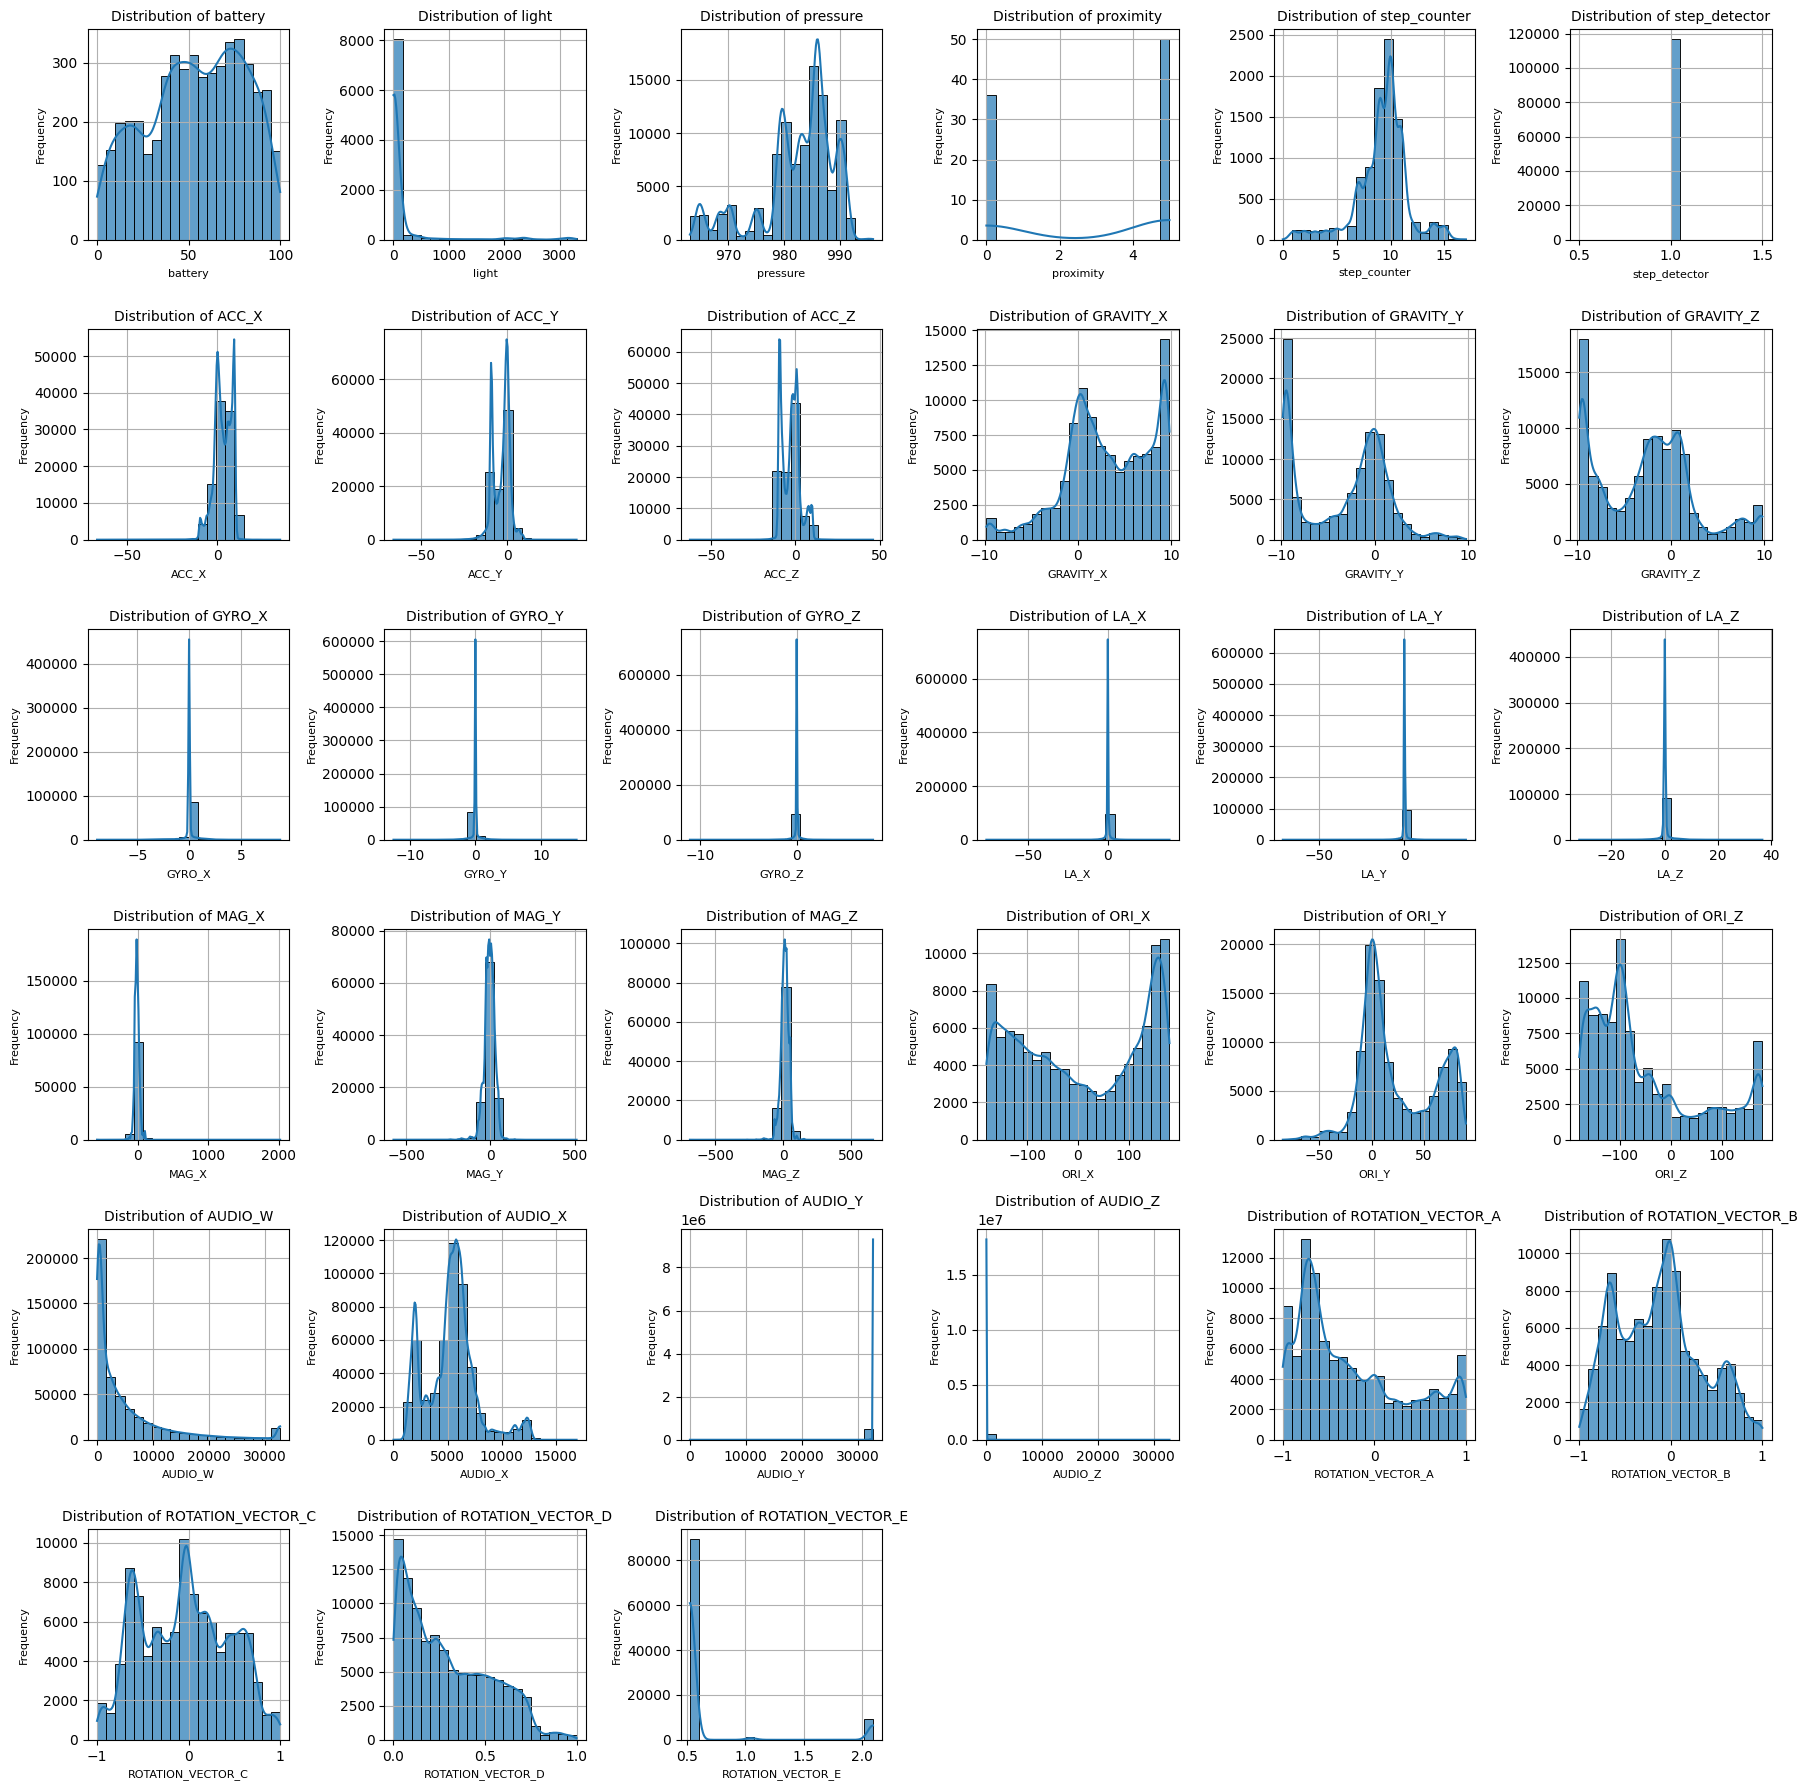

In [43]:
# Create a subplot grid with a 6x6 layout
num_rows = 6
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Flatten the 2D array of axes to simplify iteration
axes = axes.flatten()

# Set a single color for all plots
plot_color = '#1f77b4'  # Blue color, you can change it to any other valid color code

# Plot distribution diagrams for each column
for i, column in enumerate(feature_columns):
    ax = axes[i]
    sns.histplot(smart_phone[column], ax=ax, bins=20, kde=True, color=plot_color, alpha=0.7)
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.grid(True)

# If there are more axes than columns, remove the extra empty plots
for j in range(len(feature_columns), num_rows * num_cols):
    axes[j].axis('off')

# Add the overall title for the entire plot
# plt.suptitle("Distribution diagrams - Smart phone", fontsize=18)

plt.tight_layout()
plt.show()

# Smart watch data

In [45]:
watch_df = pd.read_csv("data/F_smart_watch.csv")
watch_df.head()

,timestamp,battery,pressure,step_counter,step_detector,HEART_RATE_X,HEART_RATE_Y,ACC_X,ACC_Y,ACC_Z,...,MAG_Y,MAG_Z,ORI_X,ORI_Y,ORI_Z,ROTATION_VECTOR_A,ROTATION_VECTOR_B,ROTATION_VECTOR_C,ROTATION_VECTOR_D,ROTATION_VECTOR_E
0,2017-06-29 07:45:56.262,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-29 07:46:01.263,NaN,NaN,NaN,NaN,NaN,NaN,-0.344086,0.683304,9.967361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-06-29 07:46:01.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-29 07:46:01.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-29 07:46:01.402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
watch_df.columns

Index(['timestamp', 'battery', 'pressure', 'step_counter', 'step_detector',
       'HEART_RATE_X', 'HEART_RATE_Y', 'ACC_X', 'ACC_Y', 'ACC_Z', 'GRAVITY_X',
       'GRAVITY_Y', 'GRAVITY_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'LA_X', 'LA_Y',
       'LA_Z', 'MAG_X', 'MAG_Y', 'MAG_Z', 'ORI_X', 'ORI_Y', 'ORI_Z',
       'ROTATION_VECTOR_A', 'ROTATION_VECTOR_B', 'ROTATION_VECTOR_C',
       'ROTATION_VECTOR_D', 'ROTATION_VECTOR_E'],
      dtype='object')

In [47]:
feature_columns = ['battery', 'pressure', 'step_counter', 'step_detector',
       'HEART_RATE_X', 'HEART_RATE_Y', 'ACC_X', 'ACC_Y', 'ACC_Z', 'GRAVITY_X',
       'GRAVITY_Y', 'GRAVITY_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'LA_X', 'LA_Y',
       'LA_Z', 'MAG_X', 'MAG_Y', 'MAG_Z', 'ORI_X', 'ORI_Y', 'ORI_Z',
       'ROTATION_VECTOR_A', 'ROTATION_VECTOR_B', 'ROTATION_VECTOR_C',
       'ROTATION_VECTOR_D', 'ROTATION_VECTOR_E']

In [48]:
len(feature_columns)

29

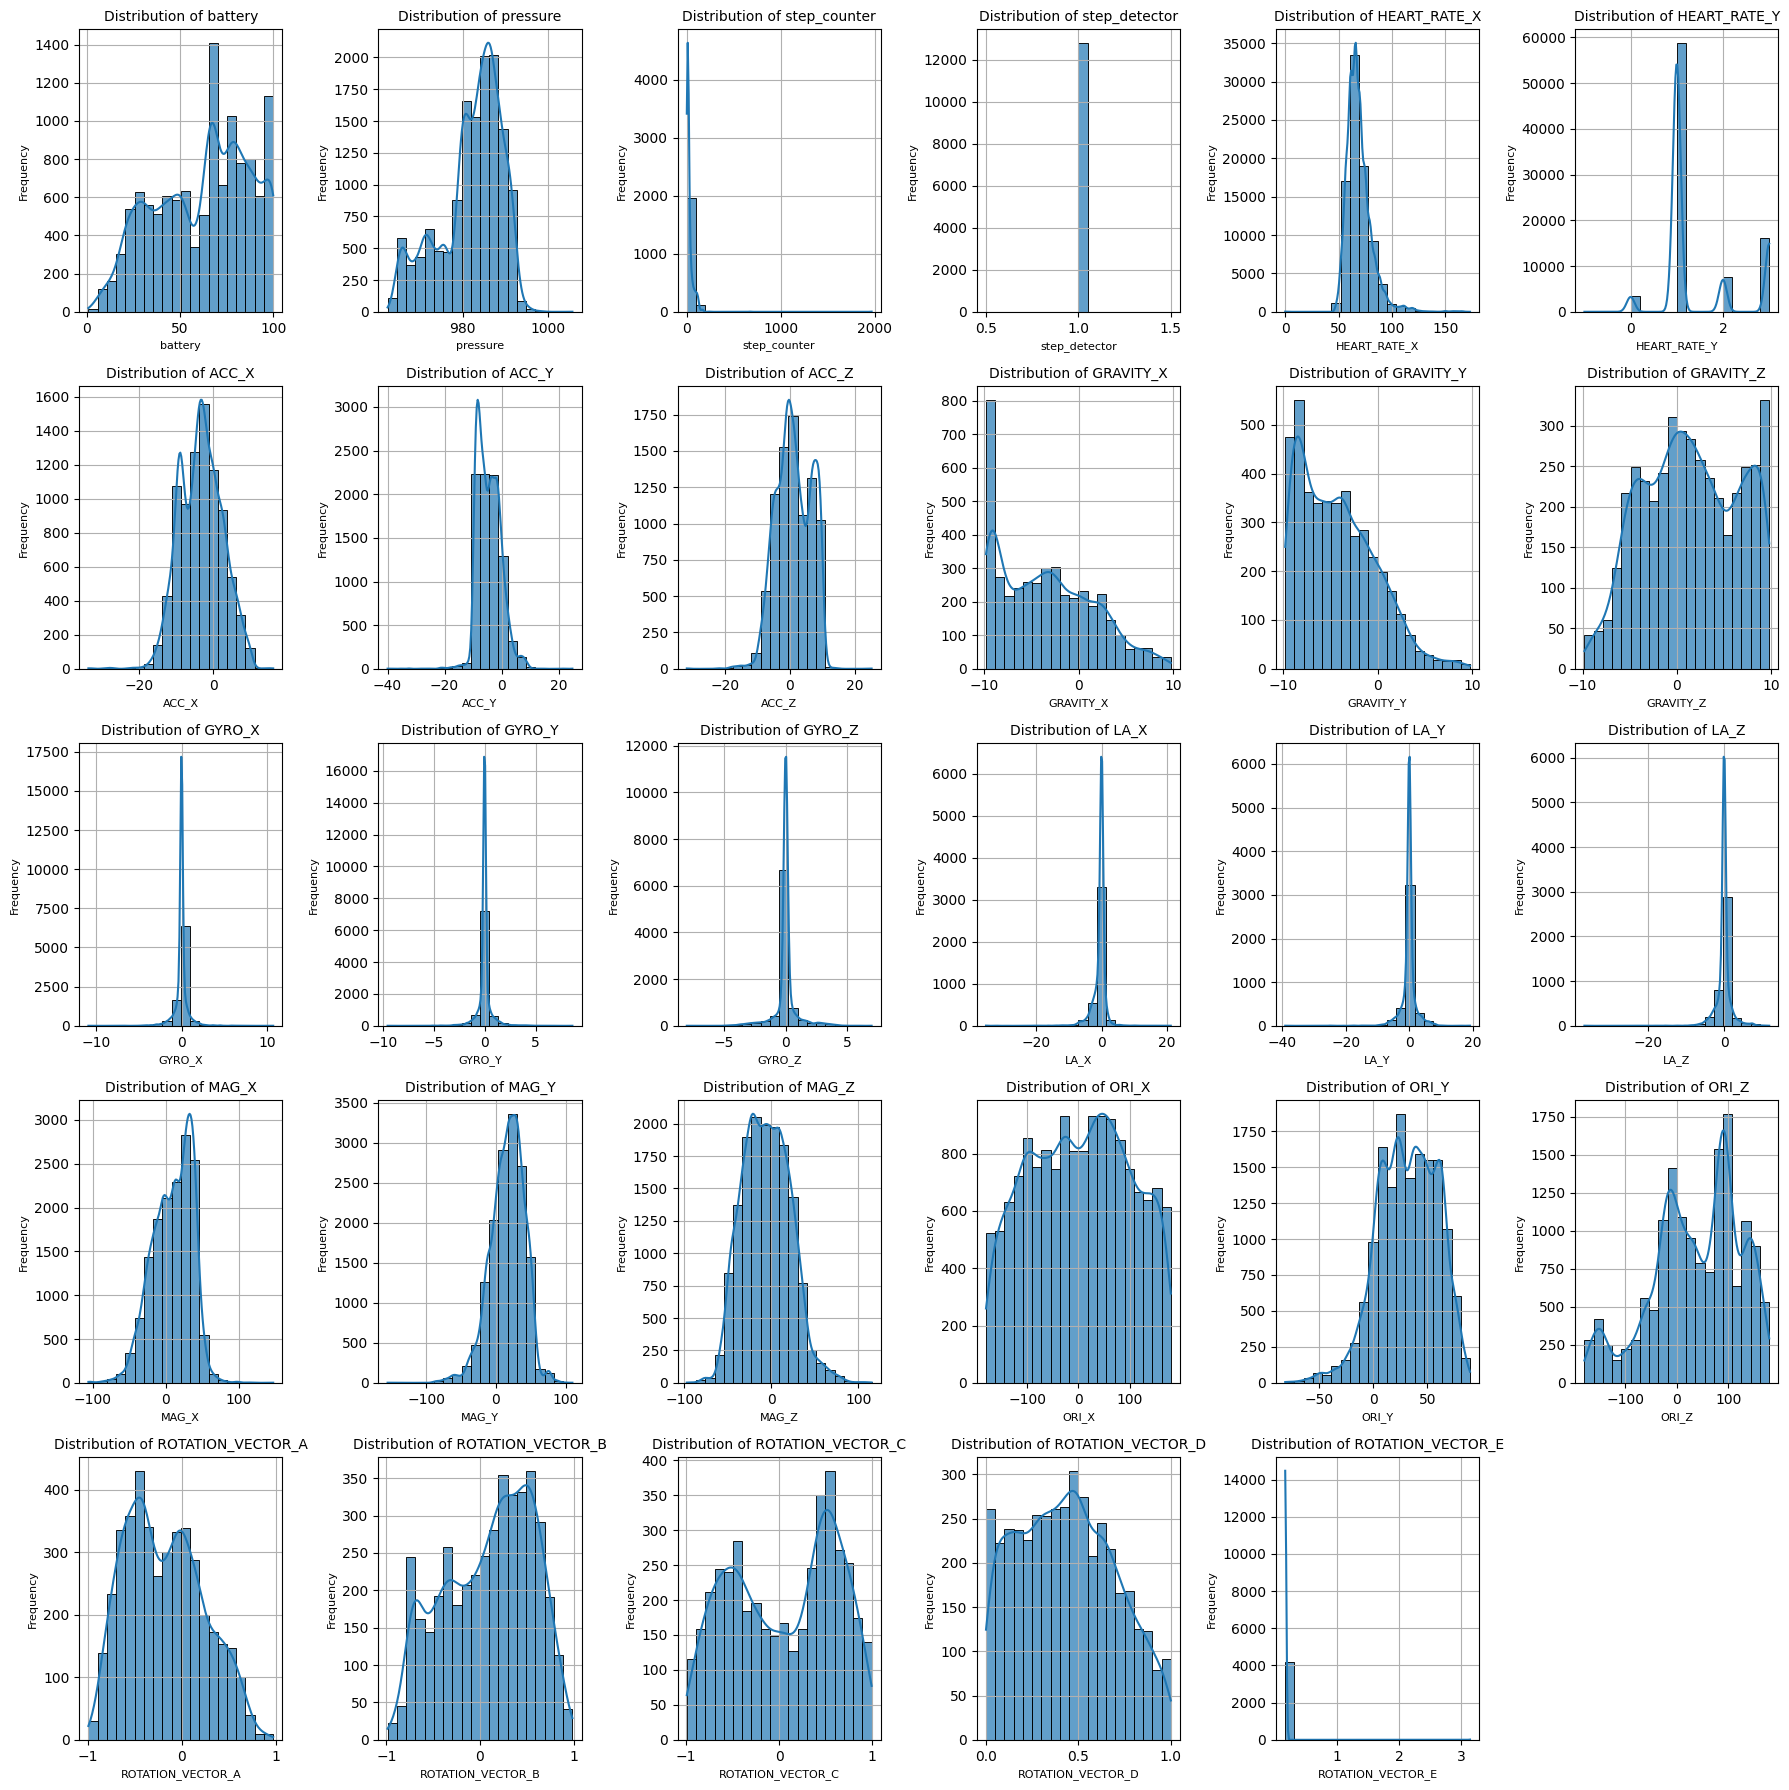

In [49]:
# Create a subplot grid with a 5x6 layout
num_rows = 5
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Flatten the 2D array of axes to simplify iteration
axes = axes.flatten()

# Set a single color for all plots
plot_color = '#1f77b4'  # Blue color, you can change it to any other valid color code

# Plot distribution diagrams for each column
for i, column in enumerate(feature_columns):
    ax = axes[i]
    sns.histplot(watch_df[column], ax=ax, bins=20, kde=True, color=plot_color, alpha=0.7)
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.grid(True)

# If there are more axes than columns, remove the extra empty plots
for j in range(len(feature_columns), num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Smart glasses

In [52]:
glasses_df = pd.read_csv("data/glasses.csv")
glasses_df.head()

,NUM,DATE,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V
0,1,2017/06/29 08:00:00.406,-3242,10396,-6489,9117,2018,-819,-330,-186,-144,258
1,3,2017/06/29 08:00:00.426,-4014,11348,-15131,3359,-882,-2009,-305,-156,-149,230
2,5,2017/06/29 08:00:00.446,-3223,10918,-8496,-460,211,-2631,-64,84,-148,-10
3,7,2017/06/29 08:00:00.466,-5255,10690,-10854,1152,333,-3799,314,432,-118,-373
4,9,2017/06/29 08:00:00.486,-560,14164,-8619,-327,488,-2833,577,643,-66,-610


In [53]:
glasses_df.columns

Index(['NUM', 'DATE', 'ACC_X', 'ACC_Y', 'ACC_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z',
       'EOG_L', 'EOG_R', 'EOG_H', 'EOG_V'],
      dtype='object')

In [55]:
feature_columns = ['ACC_X', 'ACC_Y', 'ACC_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z',
       'EOG_L', 'EOG_R', 'EOG_H', 'EOG_V']
len(feature_columns)

10

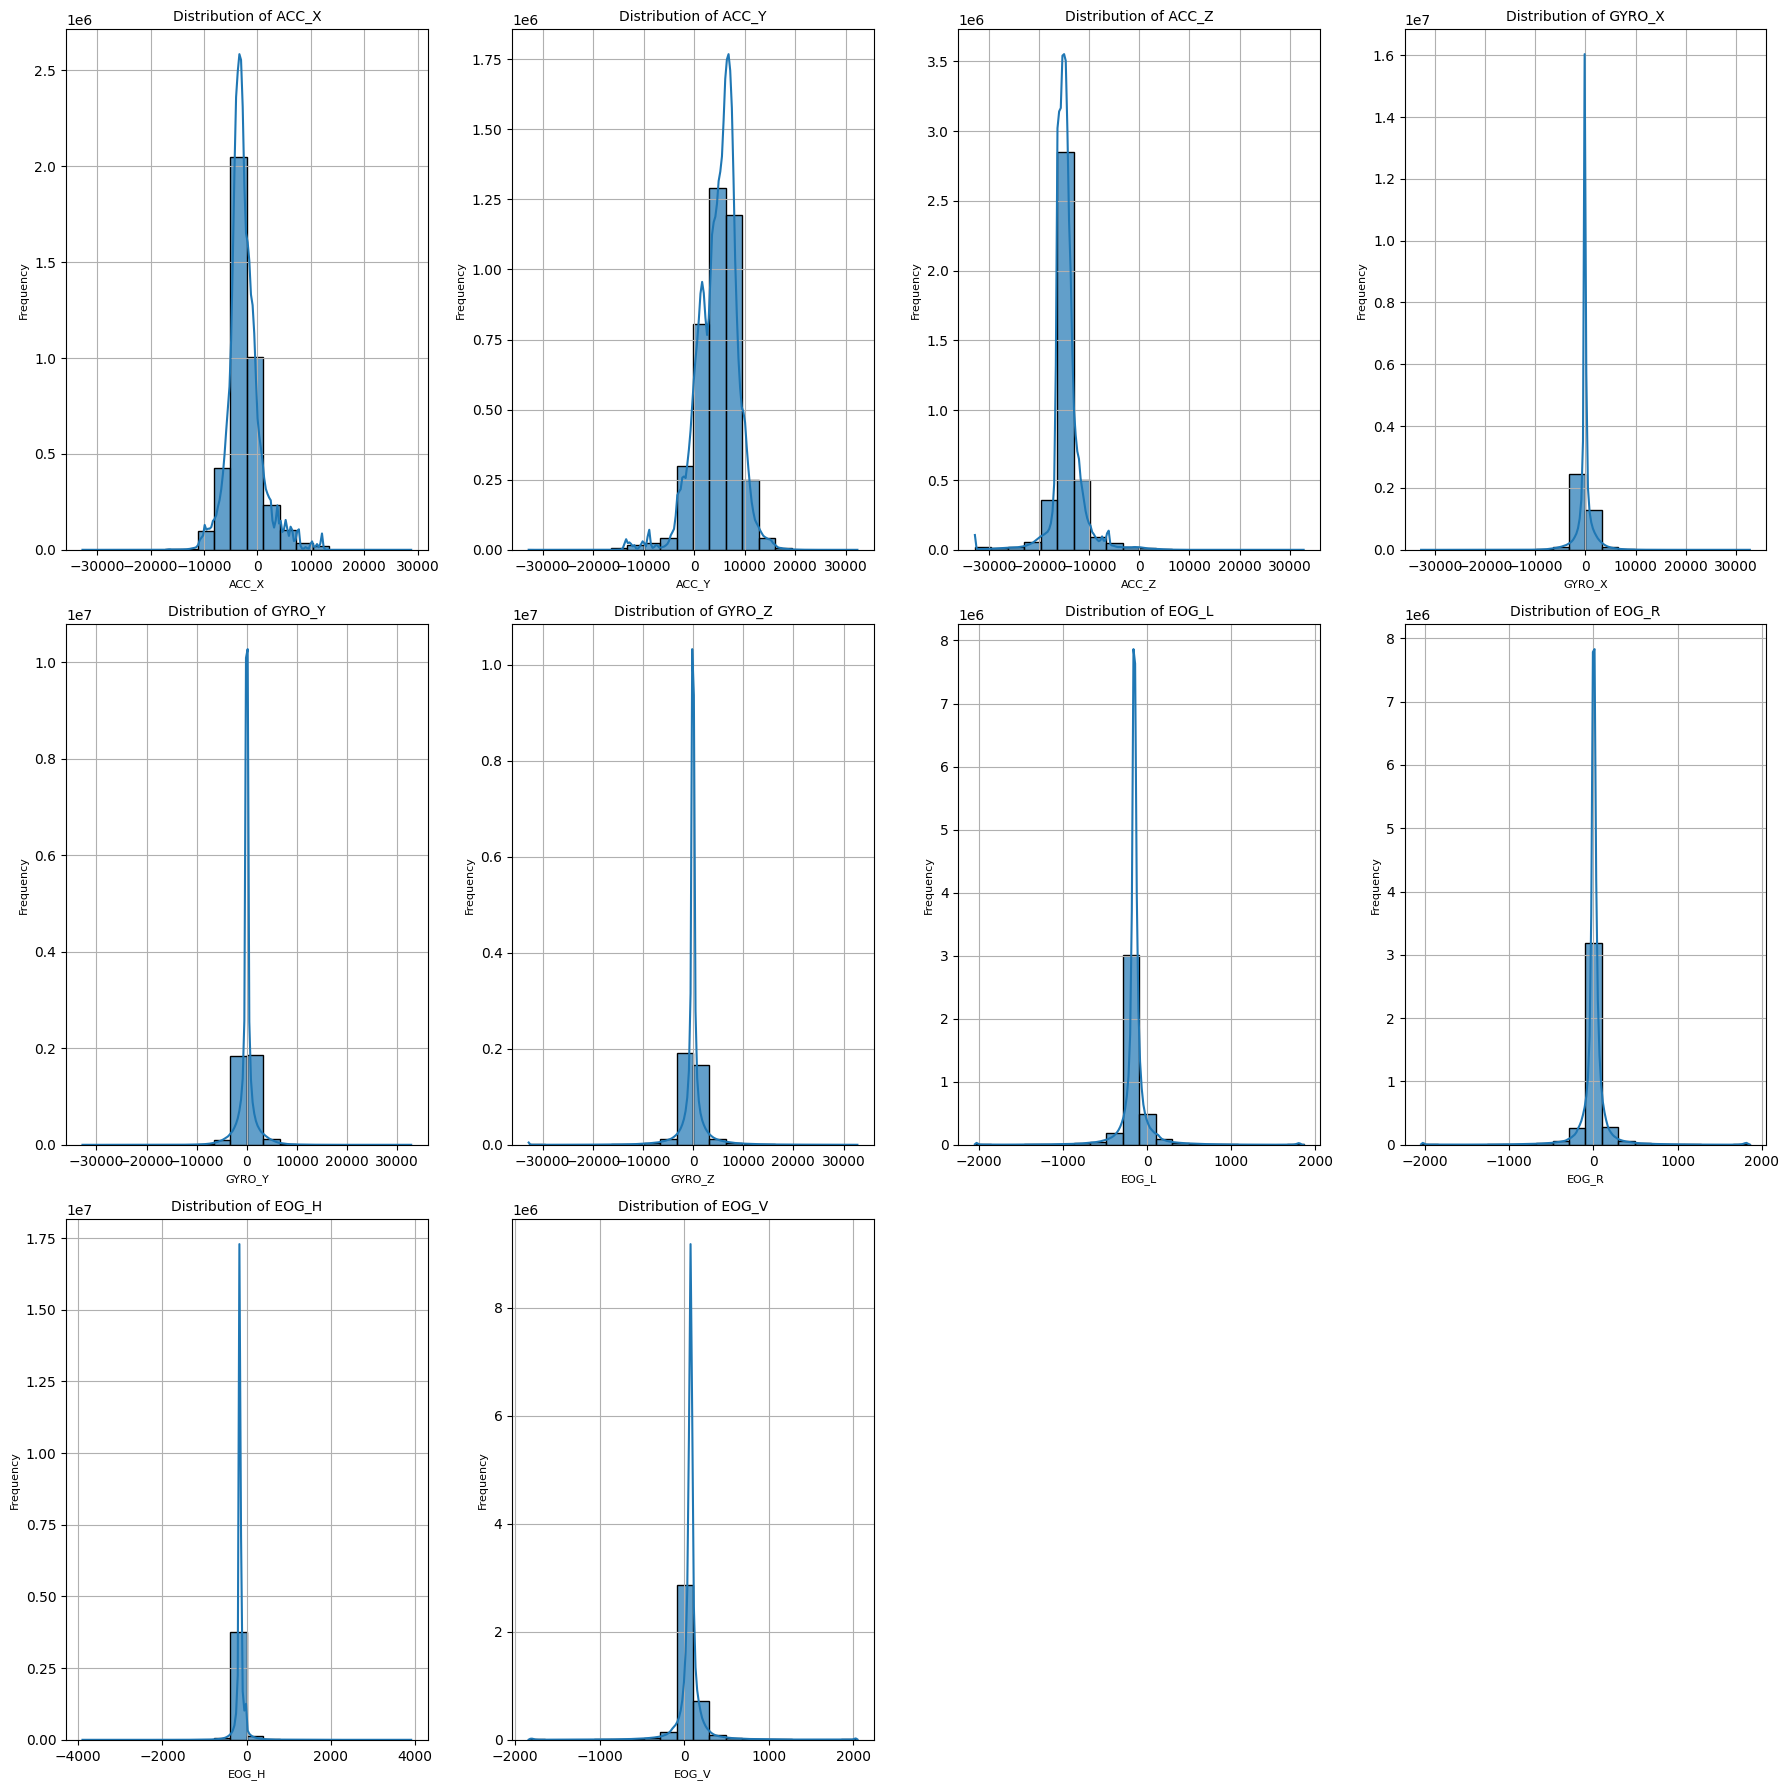

In [56]:
# Create a subplot grid with a 3x4 layout
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Flatten the 2D array of axes to simplify iteration
axes = axes.flatten()

# Set a single color for all plots
plot_color = '#1f77b4'  # Blue color, you can change it to any other valid color code

# Plot distribution diagrams for each column
for i, column in enumerate(feature_columns):
    ax = axes[i]
    sns.histplot(glasses_df[column], ax=ax, bins=20, kde=True, color=plot_color, alpha=0.7)
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.grid(True)

# If there are more axes than columns, remove the extra empty plots
for j in range(len(feature_columns), num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()